<h3 align=center> In His Name, the Most High </h3>

In [1]:
#importing libraries
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

## ATIS Dataset EDA

The ATIS dataset is a standard benchmark dataset widely used for intent classification and slot filling.
here we obtained the dataset from https://github.com/yvchen/JointSLU.

In [2]:
#importing train data

train_words = list() # a list of list of words for every sentence in train dataset
train_tags = list() # a list of list of IOB tags for every sentence in train dataset
train_intents = list() # a list of intent for every sentence in train dataset
train_data = list() # a list of dicts contaiting above data in a more structured form
train_vocabs = set() # a set containing whole train dataset words

with open('atis-2.train+dev.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                # what to do if word.isalpha()??
                word = re.sub(r'[^\w\s]', '', word.lower()) # removing punctuations & lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
                    
        #handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]

        if (intent != 'atis_cheapest'): #droping 'atis_cheapest' because it has only 1 sample!
          train_words.append(words)
          train_tags.append(tags)
          train_intents.append(intent)
          train_data.append({
              'words': words,
              'iob_tags': tags,
              #             'length': len(words),
              'intent': intent})

print('train dataset vocab size:', len(train_vocabs))
print('# of train dataset rows:', len(train_data))
print('# of train dataset unique intents:', len(set(train_intents)))
print('# of train dataset unique IOB tags:', len(set([tag for item in train_tags for tag in item])))

train dataset vocab size: 895
# of train dataset rows: 4977
# of train dataset unique intents: 16
# of train dataset unique IOB tags: 121


In [3]:
ind = 5
print('tokenized words:', train_data[ind]['words'])
print('IOB tags:', train_data[ind]['iob_tags'])
print('intent:', train_data[ind]['intent'])

tokenized words: ['im', 'looking', 'for', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'stops', 'in', 'st', 'louis', 'hopefully', 'a', 'dinner', 'flight', 'how', 'can', 'i', 'find', 'that', 'out']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name', 'O', 'O', 'B-meal_description', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
intent: atis_flight


In [4]:
train_intents_freq = dict()
for intent in train_intents:
    train_intents_freq[intent] = train_intents.count(intent)
    
for key in train_intents_freq:
    value = train_intents_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents) * 100))

atis_flight: 3687 (74.08%),
atis_airfare: 424 (8.52%),
atis_airline: 159 (3.19%),
atis_ground_service: 256 (5.14%),
atis_quantity: 51 (1.02%),
atis_city: 19 (0.38%),
atis_abbreviation: 147 (2.95%),
atis_aircraft: 82 (1.65%),
atis_distance: 20 (0.40%),
atis_ground_fare: 18 (0.36%),
atis_capacity: 16 (0.32%),
atis_flight_time: 54 (1.08%),
atis_meal: 6 (0.12%),
atis_flight_no: 12 (0.24%),
atis_restriction: 6 (0.12%),
atis_airport: 20 (0.40%),


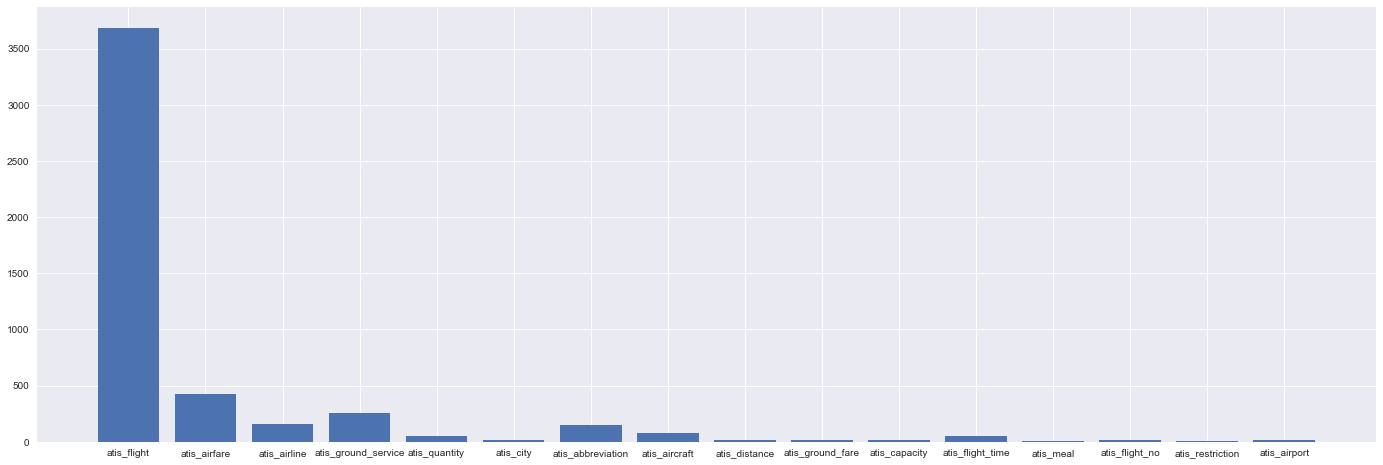

In [5]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_freq.keys()),train_intents_freq.values())
plt.show()

In [6]:
train_tags_freq = dict()
for item in train_tags:
    for tag in item:
        if (tag in train_tags_freq): train_tags_freq[tag] += item.count(tag)
        else: train_tags_freq[tag] = item.count(tag)
train_tags_freq

{'O': 304452,
 'B-fromloc.city_name': 4670,
 'B-toloc.city_name': 4777,
 'B-round_trip': 374,
 'I-round_trip': 361,
 'B-cost_relative': 365,
 'B-fare_amount': 73,
 'I-fare_amount': 71,
 'B-arrive_date.month_name': 47,
 'B-arrive_date.day_number': 47,
 'I-fromloc.city_name': 841,
 'B-stoploc.city_name': 243,
 'B-arrive_time.time_relative': 203,
 'B-arrive_time.time': 224,
 'I-arrive_time.time': 191,
 'B-toloc.state_code': 86,
 'I-toloc.city_name': 1289,
 'I-stoploc.city_name': 75,
 'B-meal_description': 57,
 'B-depart_date.month_name': 387,
 'B-depart_date.day_number': 413,
 'B-airline_name': 743,
 'I-airline_name': 449,
 'B-depart_time.period_of_day': 707,
 'B-depart_date.day_name': 1001,
 'B-toloc.state_name': 77,
 'B-depart_time.time_relative': 343,
 'B-depart_time.time': 391,
 'B-toloc.airport_name': 39,
 'I-toloc.airport_name': 77,
 'B-depart_date.date_relative': 82,
 'B-or': 84,
 'B-airline_code': 148,
 'B-class_type': 225,
 'I-class_type': 189,
 'I-cost_relative': 55,
 'I-depart_

In [7]:
#importing test data

test_words = list()  # a list of list of words for every sentence in test dataset
test_tags = list() # a list of list of IOB tags for every sentence in test dataset
test_intents = list() # a list of intent for every sentence in test dataset
test_vocabs = set() # a list of dicts contaiting above data in a more structured form
test_data = list() # a set containing whole test dataset words

with open('atis.test.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                word = re.sub(r'[^\w\s]', '', word.lower()) # removing punctuations & lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        test_words.append(words)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
        test_tags.append(tags)
                    
        #handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]
        test_intents.append(intent)
        
        test_data.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('train dataset vocab size:', len(test_vocabs))
print('# of test dataset rows:', len(test_data))
print('# of test dataset unique intents:', len(set(test_intents)))
print('# of test dataset unique IOB tags:', len(set([tag for item in test_tags for tag in item])))

train dataset vocab size: 0
# of test dataset rows: 893
# of test dataset unique intents: 16
# of test dataset unique IOB tags: 101


In [8]:
ind = 0
print('tokenized words:', test_data[ind]['words'])
print('IOB tags:', test_data[ind]['iob_tags'])
print('intent:', test_data[ind]['intent'])

tokenized words: ['i', 'would', 'like', 'to', 'find', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'st', 'louis']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
intent: atis_flight


In [9]:
test_intents_freq = dict()
for intent in test_intents:
    test_intents_freq[intent] = test_intents.count(intent)
    
for key in test_intents_freq:
    value = test_intents_freq[key]
    print('%s: %d (%.2f%%) ,' % (key, value, value / len(test_intents) * 100))

atis_flight: 645 (72.23%) ,
atis_airfare: 49 (5.49%) ,
atis_ground_service: 36 (4.03%) ,
atis_day_name: 2 (0.22%) ,
atis_meal: 6 (0.67%) ,
atis_airport: 18 (2.02%) ,
atis_airline: 38 (4.26%) ,
atis_flight_time: 1 (0.11%) ,
atis_city: 6 (0.67%) ,
atis_ground_fare: 7 (0.78%) ,
atis_quantity: 3 (0.34%) ,
atis_abbreviation: 33 (3.70%) ,
atis_distance: 10 (1.12%) ,
atis_aircraft: 9 (1.01%) ,
atis_capacity: 21 (2.35%) ,
atis_flight_no: 9 (1.01%) ,


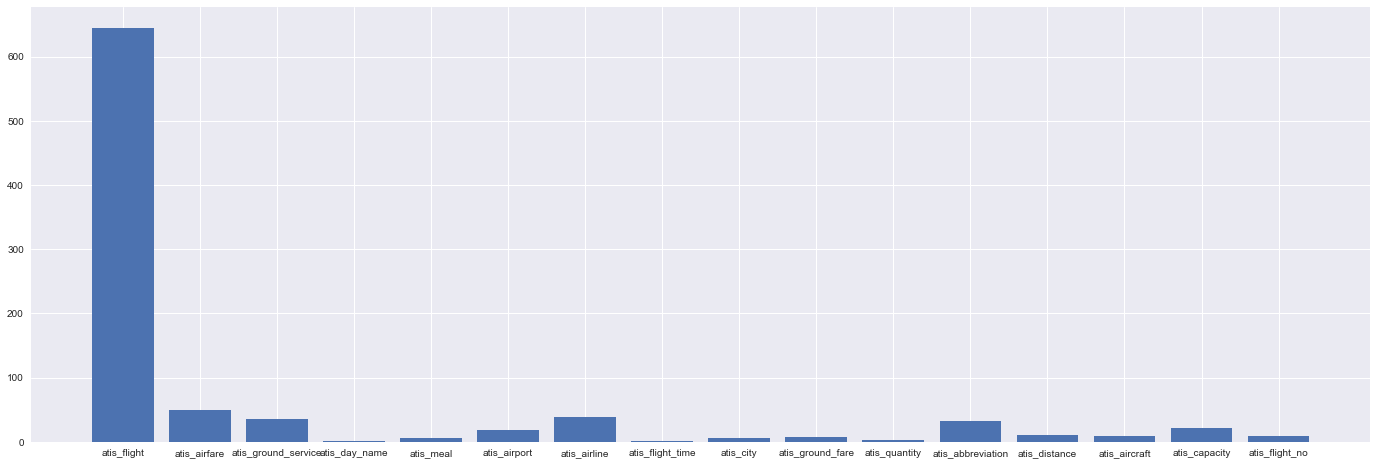

In [10]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_freq.keys()),test_intents_freq.values())
plt.show()

In [11]:
test_tags_freq = dict()
for item in test_tags:
    for tag in item:
        if (tag in test_tags_freq): test_tags_freq[tag] += item.count(tag)
        else: test_tags_freq[tag] = item.count(tag)
test_tags_freq

{'O': 39659,
 'B-fromloc.city_name': 730,
 'B-toloc.city_name': 764,
 'I-toloc.city_name': 369,
 'B-stoploc.city_name': 20,
 'I-stoploc.city_name': 10,
 'B-depart_date.month_name': 56,
 'B-depart_date.day_number': 55,
 'B-depart_time.time_relative': 65,
 'B-depart_time.time': 57,
 'I-depart_time.time': 52,
 'B-round_trip': 73,
 'I-round_trip': 71,
 'B-airline_name': 125,
 'I-airline_name': 75,
 'B-depart_date.day_name': 222,
 'B-depart_time.period_of_day': 142,
 'I-fromloc.city_name': 203,
 'B-meal_description': 10,
 'B-depart_date.date_relative': 17,
 'B-arrive_time.time_relative': 33,
 'B-arrive_time.time': 34,
 'I-arrive_time.time': 37,
 'B-return_date.day_name': 2,
 'B-arrive_date.date_relative': 2,
 'B-arrive_date.day_name': 11,
 'B-flight_stop': 21,
 'B-depart_date.today_relative': 9,
 'B-toloc.state_name': 28,
 'B-arrive_date.month_name': 6,
 'B-arrive_date.day_number': 6,
 'B-arrive_time.start_time': 8,
 'B-arrive_time.end_time': 8,
 'I-arrive_time.end_time': 8,
 'B-airport_nam

##### comparing train & test dataset tags & intents:

In [12]:
print(test_vocabs.difference(train_vocabs))

set()


In [13]:
set(test_intents).difference(set(train_intents))

{'atis_day_name'}

so from above, we see there is no train data for 'atis_day_name'...

In [14]:
set(train_intents).difference(set(test_intents))

{'atis_restriction'}

and also there are no test data for 'atis_cheapest' & 'atis_restriction'...

In [15]:
set(test_tags_freq.keys()).difference(set(train_tags_freq.keys()))

{'B-booking_class',
 'B-compartment',
 'B-flight',
 'B-stoploc.airport_code',
 'I-flight_number',
 'I-state_name'}

also we see there are no train data with 'B-stoploc.airport_code' or 'B-booking_class' or 'I-flight_number' or 'I-state_name' or 'B-flight' or 'B-compartment' tag...

In [16]:
set(train_tags_freq.keys()).difference(set(test_tags_freq.keys()))

{'B-arrive_date.today_relative',
 'B-arrive_time.period_mod',
 'B-day_number',
 'B-month_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-stoploc.airport_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'I-arrive_date.day_number',
 'I-arrive_time.period_of_day',
 'I-depart_date.today_relative',
 'I-economy',
 'I-fare_basis_code',
 'I-flight_stop',
 'I-meal_code',
 'I-meal_description',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-time',
 'I-today_relative'}

and finally there are no train data with 'I-return_date.day_number' or 'B-return_time.period_mod' or ... tag.

to handle imbalanced data first we try to find and remove duplicates:

In [17]:
#removing duplicate train data with 'atis_flight' intent

train_words_dup_free = list()
train_tags_dup_free = list()
train_intents_dup_free = list()
train_data_dup_free = list()
for i in range(len(train_words)):
    words = train_words[i]
    tags = train_tags[i]
    intent = train_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in train_words_dup_free)):
        train_words_dup_free.append(words)
        train_tags_dup_free.append(tags)
        train_intents_dup_free.append(intent)
        train_data_dup_free.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('# of duplicate sentences in train data: %d - %d = %d' % (len(train_words), len(train_words_dup_free), len(train_words) - len(train_words_dup_free)))

# of duplicate sentences in train data: 4977 - 4733 = 244


In [18]:
train_intents_dup_free_freq = dict()
for intent in train_intents_dup_free:
    train_intents_dup_free_freq[intent] = train_intents_dup_free.count(intent)

for key in train_intents_dup_free_freq:
    value = train_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents_dup_free) * 100))

atis_flight: 3443 (72.74%),
atis_airfare: 424 (8.96%),
atis_airline: 159 (3.36%),
atis_ground_service: 256 (5.41%),
atis_quantity: 51 (1.08%),
atis_city: 19 (0.40%),
atis_abbreviation: 147 (3.11%),
atis_aircraft: 82 (1.73%),
atis_distance: 20 (0.42%),
atis_ground_fare: 18 (0.38%),
atis_capacity: 16 (0.34%),
atis_flight_time: 54 (1.14%),
atis_meal: 6 (0.13%),
atis_flight_no: 12 (0.25%),
atis_restriction: 6 (0.13%),
atis_airport: 20 (0.42%),


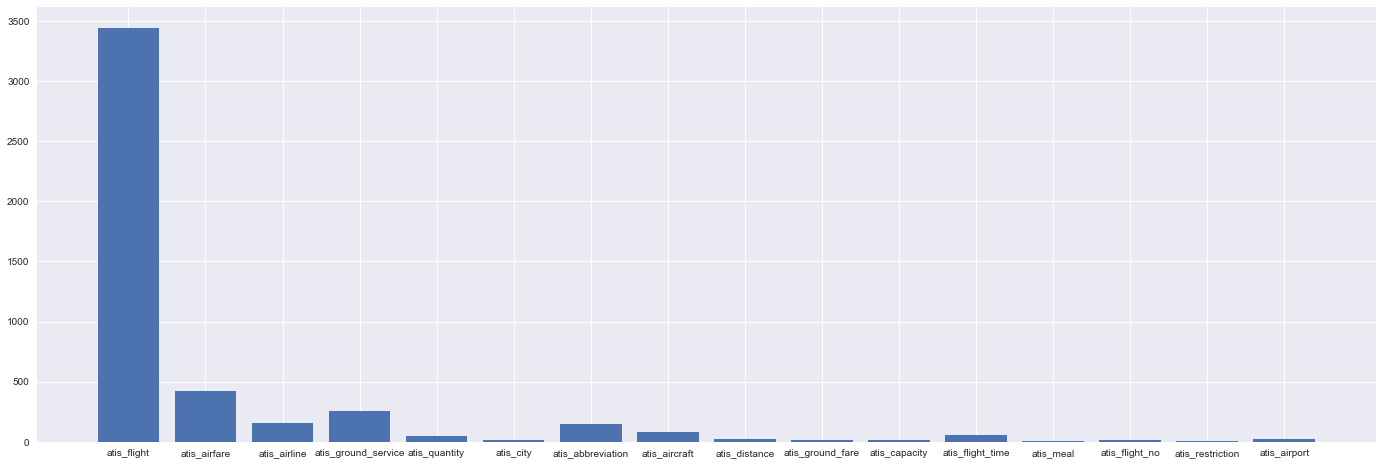

In [19]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_dup_free_freq.keys()),train_intents_dup_free_freq.values())
plt.show()

In [20]:
##removing duplicate test data with 'atis_flight' intent

test_words_dup_free = list()
test_tags_dup_free = list()
test_intents_dup_free = list()
test_data_dup_free = list()
for i in range(len(test_words)):
    words = test_words[i]
    tags = test_tags[i]
    intent = test_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in test_words_dup_free)):
        test_words_dup_free.append(words)
        test_tags_dup_free.append(tags)
        test_intents_dup_free.append(intent)
        test_data.append({
            'words': words,
            'iob_tags': tags,
#             'length': len(words),
            'intent': intent})


print('# of duplicate sentences in test data: %d - %d = %d' % (len(test_words), len(test_words_dup_free),  len(test_words) - len(test_words_dup_free)))

# of duplicate sentences in test data: 893 - 874 = 19


In [21]:
test_intents_dup_free_freq = dict()
for intent in test_intents_dup_free:
    test_intents_dup_free_freq[intent] = test_intents_dup_free.count(intent)

for key in test_intents_dup_free_freq:
    value = test_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(test_intents_dup_free) * 100))

atis_flight: 626 (71.62%),
atis_airfare: 49 (5.61%),
atis_ground_service: 36 (4.12%),
atis_day_name: 2 (0.23%),
atis_meal: 6 (0.69%),
atis_airport: 18 (2.06%),
atis_airline: 38 (4.35%),
atis_flight_time: 1 (0.11%),
atis_city: 6 (0.69%),
atis_ground_fare: 7 (0.80%),
atis_quantity: 3 (0.34%),
atis_abbreviation: 33 (3.78%),
atis_distance: 10 (1.14%),
atis_aircraft: 9 (1.03%),
atis_capacity: 21 (2.40%),
atis_flight_no: 9 (1.03%),


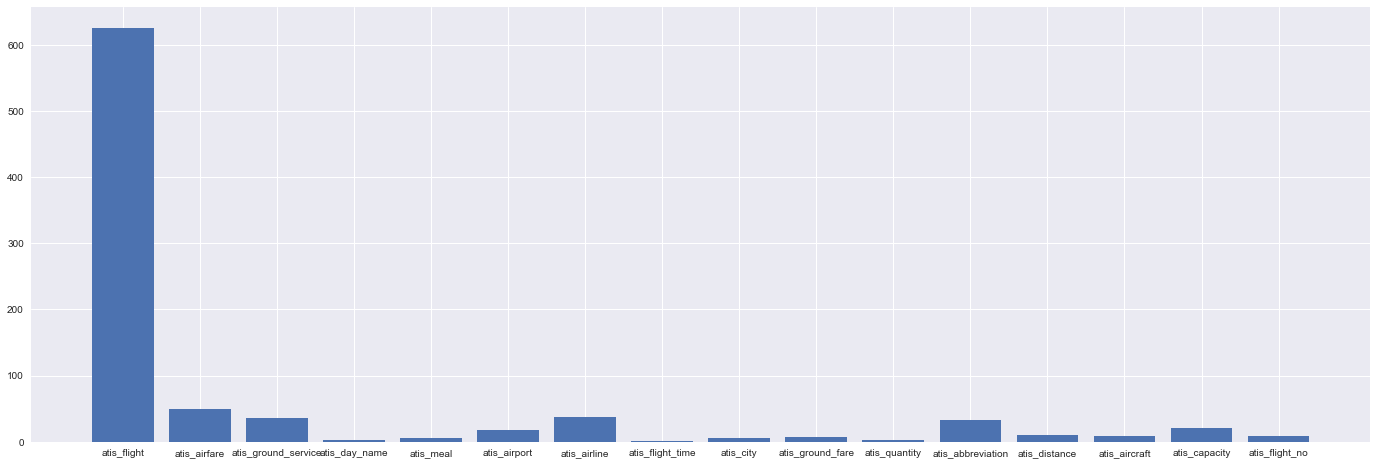

In [22]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_dup_free_freq.keys()),test_intents_dup_free_freq.values())
plt.show()

so we can see that unfortunately removing duplicates didn't have any noticable improvment on balancing the dataset.

In [23]:
#in progress! --> finding other techniques for imbalance data handling

In [24]:
from sklearn.utils import class_weight
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def identity_tokenizer(text):
    return text
# define Tokenizer with Vocab Size
# tokenizer = Tokenizer(num_words=len(train_vocabs))
# tokenizer.fit_on_texts(train_words)
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x_train = vectorizer.fit_transform(train_words)
x_test = vectorizer.fit_transform(test_words)
# x_train = tokenizer.texts_to_matrix(train_words, mode='tfidf')
# x_test = tokenizer.texts_to_matrix(test_words, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_intents)
y_train = encoder.transform(train_intents)
y_test = encoder.transform(test_intents)
print(encoder.classes_)
print(x_train.shape, y_train.shape)
#class_weight.compute_class_weight('balanced',np.unique(train_intents) ,train_intents)

['atis_abbreviation' 'atis_aircraft' 'atis_airfare' 'atis_airline'
 'atis_airport' 'atis_capacity' 'atis_city' 'atis_distance' 'atis_flight'
 'atis_flight_no' 'atis_flight_time' 'atis_ground_fare'
 'atis_ground_service' 'atis_meal' 'atis_quantity' 'atis_restriction']
(4977, 895) (4977, 16)


In [25]:
desired_count = 500
strategy = {0: desired_count, 15: desired_count}# setting atis_restriction and atis_abbreviation classes count just as an example

In [26]:
from imblearn.over_sampling import SMOTE, ADASYN
smote = ADASYN(sampling_strategy=strategy, n_neighbors=5) #SMOTE(sampling_strategy='minority', k_neighbors=5)
X_sm, y_sm = smote.fit_resample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

(5811, 895) (5811, 16)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [27]:
y_temp = list(encoder.inverse_transform(y_sm))
temp_freq = dict()
for intent in y_temp:
    temp_freq[intent] = y_temp.count(intent)

for key in temp_freq:
    value = temp_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(y_temp) * 100))


atis_flight: 3687 (63.45%),
atis_airfare: 424 (7.30%),
atis_airline: 159 (2.74%),
atis_ground_service: 256 (4.41%),
atis_quantity: 51 (0.88%),
atis_city: 19 (0.33%),
atis_abbreviation: 488 (8.40%),
atis_aircraft: 82 (1.41%),
atis_distance: 20 (0.34%),
atis_ground_fare: 18 (0.31%),
atis_capacity: 16 (0.28%),
atis_flight_time: 54 (0.93%),
atis_meal: 6 (0.10%),
atis_flight_no: 12 (0.21%),
atis_restriction: 499 (8.59%),
atis_airport: 20 (0.34%),


In [28]:
# Function for augmenting data using langauge translation

from textblob import TextBlob
from textblob.translate import NotTranslated
import random
sr = random.SystemRandom()

language = ["es", "de", "fr", "ar", "te", "hi", "ja", "fa", "sq", "bg", "nl", "gu", "ig", "kk", "mt", "ps"]

def data_augmentation(message, language, aug_range=1):
    augmented_messages = []
    if hasattr(message, "decode"):
        message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        text = TextBlob(message)
        try:
            text = text.translate(to=sr.choice(language))   ## Converting to random langauge for meaningful variation
            print('converted to random lang:',text)
            text = text.translate(to="en")
        except NotTranslated:
            pass
        augmented_messages.append(str(text))

    return augmented_messages

In [29]:
data_augmentation('i want to fly from baltimore to dallas round trip', language)

converted to random lang: искам да летя от Балтимор до Далас и обратно


['I want to fly from Baltimore to Dallas and back']

In [30]:
#TO-DO: code cleaning & augmenting data using langauge translation (above function) & word embeddings & more
# also data undersampling by removing similar samples from major class (atis_flight)